In [1]:
import pandas as pd


In [2]:

# Replace 'filename.csv' with your file path
df = pd.read_csv('test_results.csv')
df.head(10)

,transformer,num_samples,fit_duration,transform_duration
0,Numpy,100000,0.114286,2.894929
1,NumbaV0,100000,0.139559,4.835126
2,NumbaV1,100000,2.303379,1.677566
3,Cython,100000,0.110111,0.249992
4,Numpy,200000,0.243055,3.642992
5,NumbaV0,200000,0.245425,4.454881
6,NumbaV1,200000,2.547487,2.290896
7,Cython,200000,0.240585,0.485764
8,Numpy,400000,0.503392,11.986228
9,NumbaV0,400000,0.488976,16.766769


In [3]:
df.groupby(["num_samples", "transformer"]).describe().T

num_samples                 100000                                  200000  \
transformer                 Cython   NumbaV0   NumbaV1     Numpy    Cython   
fit_duration       count  5.000000  5.000000  5.000000  5.000000  5.000000   
                   mean   0.119055  0.126162  2.322678  0.115418  0.245310   
                   std    0.008052  0.012173  0.037584  0.004010  0.009882   
                   min    0.110111  0.110768  2.279773  0.112690  0.239132   
                   25%    0.111308  0.118120  2.303379  0.113380  0.239494   
                   50%    0.120993  0.125647  2.311270  0.114239  0.240585   
                   75%    0.124594  0.136716  2.342198  0.114286  0.244824   
                   max    0.128269  0.139559  2.376768  0.122493  0.262515   
transform_duration count  5.000000  5.000000  5.000000  5.000000  5.000000   
                   mean   0.269498  4.106100  1.724970  1.210896  0.483410   
                   std    0.024427  0.417708  0.071311  0.941994  0.002943   
                   min    0.249992  3.791188  1.675576  0.759138  0.479868   
                   25%    0.251487  3.902823  1.677566  0.768470  0.480545   
                   50%    0.253612  3.957532  1.704072  0.786918  0.485169   
                   75%    0.294859  4.043832  1.719431  0.845024  0.485703   
                   max    0.297539  4.835126  1.848205  2.894929  0.485764   

num_samples                                               400000             \
transformer                NumbaV0   NumbaV1     Numpy    Cython    NumbaV0   
fit_duration       count  5.000000  5.000000  5.000000  5.000000   5.000000   
                   mean   0.245470  2.524695  0.247707  0.485659   0.493927   
                   std    0.001419  0.095466  0.010295  0.002733   0.016686   
                   min    0.243462  2.408997  0.239729  0.482837   0.480267   
                   25%    0.244864  2.443632  0.243055  0.483221   0.488147   
                   50%    0.245425  2.547487  0.243218  0.485399   0.488976   
                   75%    0.246553  2.591120  0.246993  0.487849   0.489217   
                   max    0.247045  2.632241  0.265541  0.488992   0.523029   
transform_duration count  5.000000  5.000000  5.000000  5.000000   5.000000   
                   mean   4.410815  2.285149  2.045753  0.993619   7.770315   
                   std    0.122702  0.109448  0.896353  0.030567   5.031428   
                   min    4.309789  2.177983  1.569434  0.960451   5.412805   
                   25%    4.335855  2.188813  1.617919  0.979187   5.428272   
                   50%    4.346861  2.290896  1.620109  0.984210   5.463477   
                   75%    4.454881  2.322528  1.778309  1.003210   5.780254   
                   max    4.606687  2.445523  3.642992  1.041038  16.766769   

num_samples                                    
transformer                NumbaV1      Numpy  
fit_duration       count  5.000000   5.000000  
                   mean   2.691423   0.489745  
                   std    0.048175   0.008207  
                   min    2.647433   0.482538  
                   25%    2.666396   0.484774  
                   50%    2.680981   0.487362  
                   75%    2.689585   0.490659  
                   max    2.772722   0.503392  
transform_duration count  5.000000   5.000000  
                   mean   3.465637   5.034493  
                   std    0.353534   3.891827  
                   min    3.249317   3.089255  
                   25%    3.268891   3.110779  
                   50%    3.332500   3.387642  
                   75%    3.386921   3.598560  
                   max    4.090554  11.986228

In [4]:
df = df.groupby(["num_samples", "transformer"]).mean().reset_index()
df["total_duration"] = df["fit_duration"] + df["transform_duration"]
df


,num_samples,transformer,fit_duration,transform_duration,total_duration
0,100000,Cython,0.119055,0.269498,0.388553
1,100000,NumbaV0,0.126162,4.106100,4.232262
2,100000,NumbaV1,2.322678,1.724970,4.047648
3,100000,Numpy,0.115418,1.210896,1.326313
4,200000,Cython,0.245310,0.483410,0.728719
5,200000,NumbaV0,0.245470,4.410815,4.656285
6,200000,NumbaV1,2.524695,2.285149,4.809844
7,200000,Numpy,0.247707,2.045753,2.293460
8,400000,Cython,0.485659,0.993619,1.479279
9,400000,NumbaV0,0.493927,7.770315,8.264242


In [5]:
results = []
for grp in df.groupby('num_samples'):
    df_g = grp[1]
    df_g["total_speedup"] = df_g[df_g.transformer == "Numpy"]["total_duration"].values[0] / df_g["total_duration"]
    results.append(df_g)

results_df = pd.concat(results)
# results_df = results_df[results_df.num_samples != 1000]
results_df

,num_samples,transformer,fit_duration,transform_duration,total_duration,total_speedup
0,100000,Cython,0.119055,0.269498,0.388553,3.413470
1,100000,NumbaV0,0.126162,4.106100,4.232262,0.313382
2,100000,NumbaV1,2.322678,1.724970,4.047648,0.327675
3,100000,Numpy,0.115418,1.210896,1.326313,1.000000
4,200000,Cython,0.245310,0.483410,0.728719,3.147246
5,200000,NumbaV0,0.245470,4.410815,4.656285,0.492551
6,200000,NumbaV1,2.524695,2.285149,4.809844,0.476826
7,200000,Numpy,0.247707,2.045753,2.293460,1.000000
8,400000,Cython,0.485659,0.993619,1.479279,3.734413
9,400000,NumbaV0,0.493927,7.770315,8.264242,0.668451


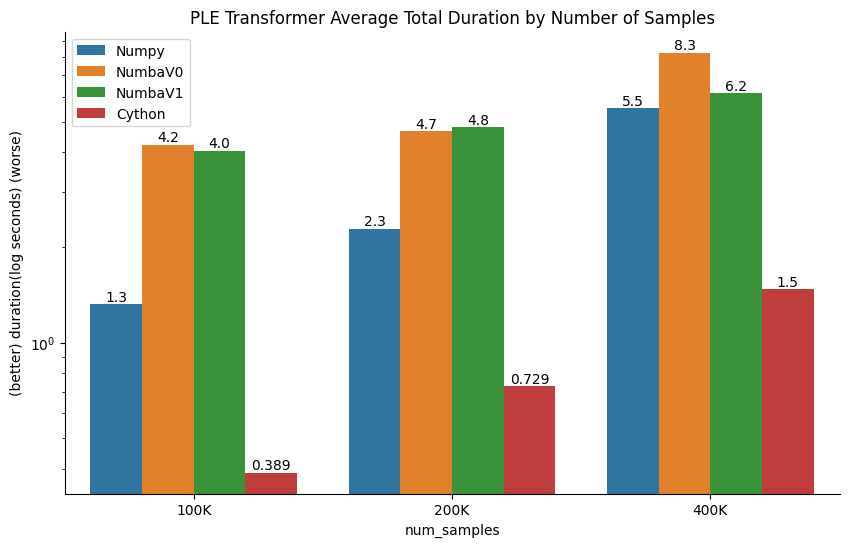

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your order
hue_order = ['Numpy', 'NumbaV0', 'NumbaV1', 'Cython']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x='num_samples', 
    y='total_duration', 
    hue='transformer',
    hue_order=hue_order, 
    data=results_df
)

# Loop over the bars
p_id = 0
for p in barplot.patches:
    p_id += 1
    if p_id > 12:
        break
    # Get the height of the bar (which is also its value)
    height = p.get_height()
    # Write the value on top of the bar
    barplot.text(x=p.get_x() + p.get_width() / 2., y=height,
                 s='{:.3f}'.format(height) if height < 1 else '{:.1f}'.format(height),
                 ha='center', va='bottom')


sns.despine()  # Remove the top and right spines from plot

# Format x-axis labels
x_labels = [
    f"{float(barplot.get_xticklabels()[i].get_text())/1e3:.0f}K" for i in range(len(barplot.get_xticklabels()))
]
plt.xticks(range(len(x_labels)), x_labels)


plt.yscale('log')
plt.ylabel('(better) duration(log seconds) (worse)')
plt.title('PLE Transformer Average Total Duration by Number of Samples')

# Move legend to upper left
plt.legend(loc='upper left')

plt.savefig('ple_transformer_total_duration.png')
plt.show()

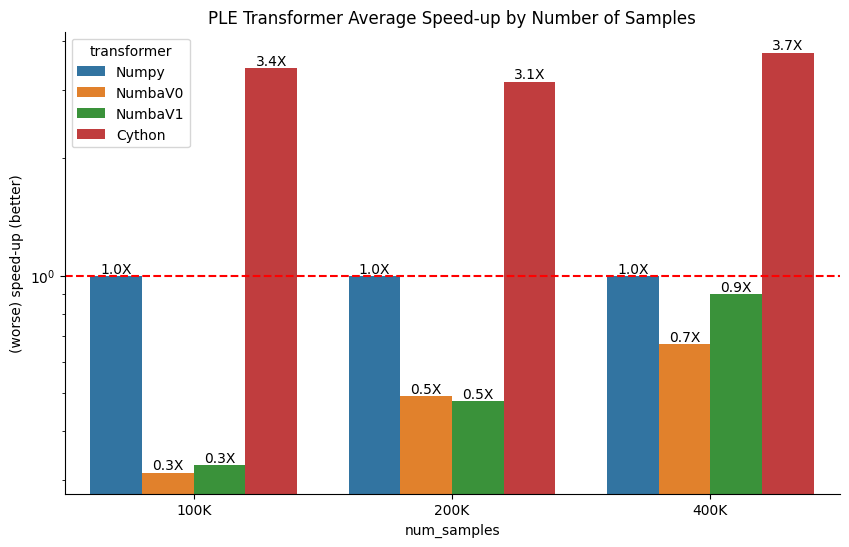

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x='num_samples', 
    y='total_speedup', 
    hue='transformer', 
    data=results_df,
    hue_order=hue_order,
)

plt.axhline(1, color='r', linestyle='--')

sns.despine()

# Loop over the bars
p_id = 0
for p in barplot.patches:
    p_id += 1
    if p_id > 12:
        break
    height = p.get_height()
    barplot.text(x=p.get_x() + p.get_width() / 2., y=height,
                 s='{:.1f}'.format(height) + "X",
                 ha='center', va='bottom')

plt.ylabel('(worse) speed-up (better)')
plt.yscale('log')
plt.title('PLE Transformer Average Speed-up by Number of Samples')

# Format x-axis labels
x_labels = [
    f"{float(barplot.get_xticklabels()[i].get_text())/1e3:.0f}K" for i in range(len(barplot.get_xticklabels()))
]
plt.xticks(range(len(x_labels)), x_labels)

plt.savefig('ple_transformer_speedup.png')
plt.show()

In [8]:
results_df.head()

,num_samples,transformer,fit_duration,transform_duration,total_duration,total_speedup
0,100000,Cython,0.119055,0.269498,0.388553,3.413470
1,100000,NumbaV0,0.126162,4.106100,4.232262,0.313382
2,100000,NumbaV1,2.322678,1.724970,4.047648,0.327675
3,100000,Numpy,0.115418,1.210896,1.326313,1.000000
4,200000,Cython,0.245310,0.483410,0.728719,3.147246


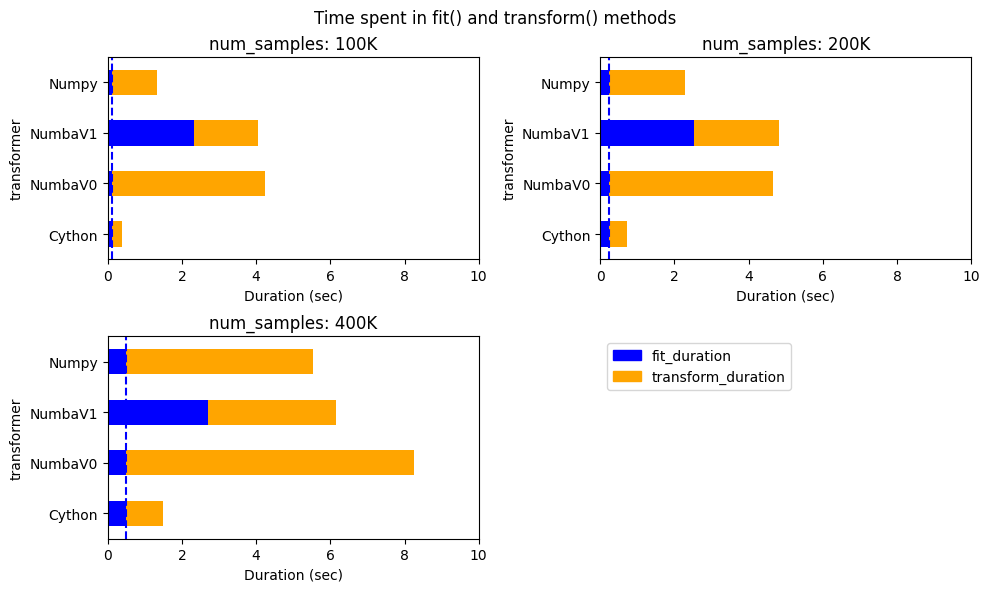

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assuming results_df is your DataFrame and it has been defined earlier
# Get the unique transformers
num_samples = results_df['num_samples'].unique()

fig, axs = plt.subplots(2, 2, figsize=(10,6))

# Define the colors and labels for your legend
colors = ['blue', 'orange']  # Replace with the colors used in your bar chart
labels = ['fit_duration', 'transform_duration']  # Replace with the labels used in your bar chart

# Create a list of patches for the legend
patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)]

# Plot the stacked bar chart for each transformer
for i, num_sample in enumerate(num_samples):
    r = i // 2
    c = i % 2
    if r == 1 and c == 1:  # Skip the plot for axs[1, 1]
        continue
    df = results_df[results_df['num_samples'] == num_sample]
    df.pivot_table(values=['fit_duration', 'transform_duration'], index='transformer').plot(
        kind='barh', stacked=True, ax=axs[r, c], legend=False, color=colors
    )
    axs[r, c].set_title(f'num_samples: {num_sample/1e3:.0f}K')
    axs[r, c].set_xlabel('Duration (sec)')
    # axs[r, c].set_xscale('log')
    axs[r, c].set_xlim([0.0, 10])
    axs[r, c].set_ylabel('transformer')
    fit_duration = df[df.transformer == 'Numpy']['fit_duration'].values[0]
    axs[r, c].axvline(fit_duration, color='b', linestyle='--')

axs[1, 1].legend(handles=patches, loc="upper left")  # Add the legend to axs[1, 1]
axs[1, 1].axis('off')  # Remove plot boundary lines for axs[1, 1]

plt.tight_layout()
plt.suptitle("Time spent in fit() and transform() methods")
plt.subplots_adjust(top=0.9)

plt.savefig('ple_fit_transform_duration.png')
plt.show()